In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
db = pd.read_csv('db_clean/titles.csv')

In [4]:
db.shape

(42874, 18)

In [5]:
numeric =  db.select_dtypes(include=np.number)

In [6]:
# scale the dataset
db2 = numeric.drop(columns='averageRating')
X = scale(db2.values)

# find PCA and transform to new coordinates
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# create a new pandas dataframe
df_plot = pd.DataFrame(X_PCA)
df_plot

,0,1,2,3,4,5,6,7
0,0.228588,-1.207749,0.263447,-0.001981,0.409805,0.362616,-0.187720,-0.023532
1,0.325426,1.009557,0.584957,0.016596,0.402090,0.362846,-0.196868,-0.027075
2,0.344681,1.377298,0.639450,0.019889,0.401193,0.363172,0.175372,-0.027179
3,0.257097,-0.576146,0.355369,0.003372,0.407718,0.362765,-0.082133,-0.024401
4,0.206766,-1.624523,0.201688,-0.005713,0.410821,0.362247,-0.609591,-0.023414
...,...,...,...,...,...,...,...,...
42869,-2.178462,-0.199365,0.441077,0.012619,0.507621,0.425646,0.751171,-0.033936
42870,-2.243929,-1.449685,0.255800,0.001422,0.510669,0.424537,-0.514443,-0.033584
42871,-2.089181,-0.347105,-2.075726,-0.098770,-1.605232,-0.377139,0.264748,-0.324313
42872,-1.934688,0.058092,-0.249451,0.039372,1.538718,0.030278,0.439012,0.047379


In [7]:
pca_loadings = pd.DataFrame(pca_model.components_.T, index=db2.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8
isAdult,0.000954,-0.005773,-0.019024,0.999180,-0.033606,0.010594,-0.000491,0.000890
startYear,-0.700242,0.034121,-0.029269,0.004593,0.123250,0.046022,0.006819,-0.700189
endYear,-0.702315,0.041737,-0.068738,-0.002026,-0.019060,0.034157,0.005297,0.706204
runtimeMinutes,0.042782,-0.052963,0.373281,0.036928,0.916954,0.054621,-0.002673,0.104242
replicas,-0.033149,-0.093017,0.643847,-0.005904,-0.306289,0.694128,-0.001942,-0.006643
birthYear,-0.036575,-0.698533,-0.103511,-0.006256,0.001703,-0.000619,-0.707077,0.000197
deathYear,-0.024539,-0.699676,-0.099247,-0.005462,0.003156,0.000470,0.707076,0.002030
numVotes,-0.107446,-0.090047,0.647776,0.012089,-0.220648,-0.715406,-0.000328,-0.009798


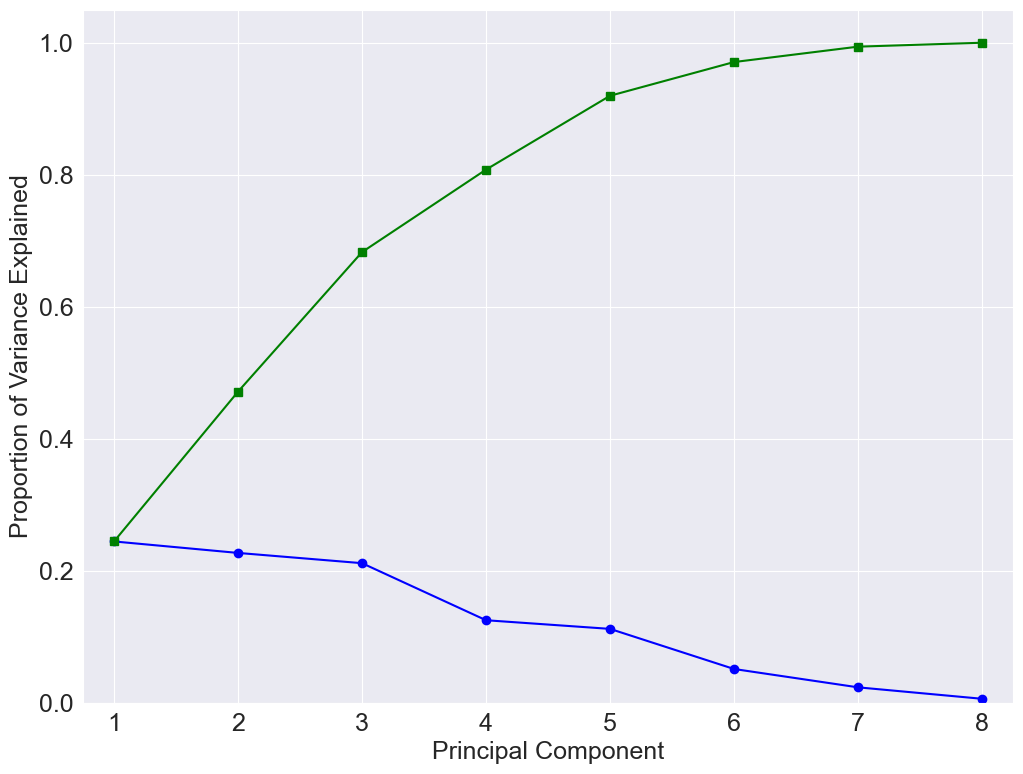

In [8]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_

plt.plot([1,2,3,4,5,6,7,8], var_ratio, '-o', color="blue", label='Individual component')
plt.plot([1,2,3,4,5,6,7,8], np.cumsum(var_ratio), '-s', label='Cumulative', color="green")


plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,8.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8])
plt.show()

# Cleaning

In [22]:
db3 = numeric.drop(columns=['isAdult'])
db3 = db3
db3.head()

,startYear,endYear,runtimeMinutes,replicas,birthYear,deathYear,averageRating,numVotes
0,2001,2001,118,41.0,1966,2024,6.4,86095
1,2001,2001,118,41.0,1921,1986,6.4,86095
2,2001,2001,118,41.0,1906,1986,6.4,86095
3,2001,2001,118,41.0,1951,2015,6.4,86095
4,2001,2001,118,41.0,1983,2024,6.4,86095


In [9]:
db3 = db.reset_index()
y = db3['averageRating']
x = db3.drop('averageRating', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = lm.LassoCV(alphas= np.arange(0.001, 10.1, .001), cv=5, fit_intercept=False)
model.fit(x_train, y_train)

C:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.84152653167257, tolerance: 128.101634
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.8554556211784, tolerance: 128.101634
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.46068903973355, tolerance: 128.101634
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lorenzo\

LassoCV(alphas=array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 1.0097e+01, 1.0098e+01,
       1.0099e+01]),
        cv=5, fit_intercept=False)

In [15]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Text(0, 0.5, 'RMSE')

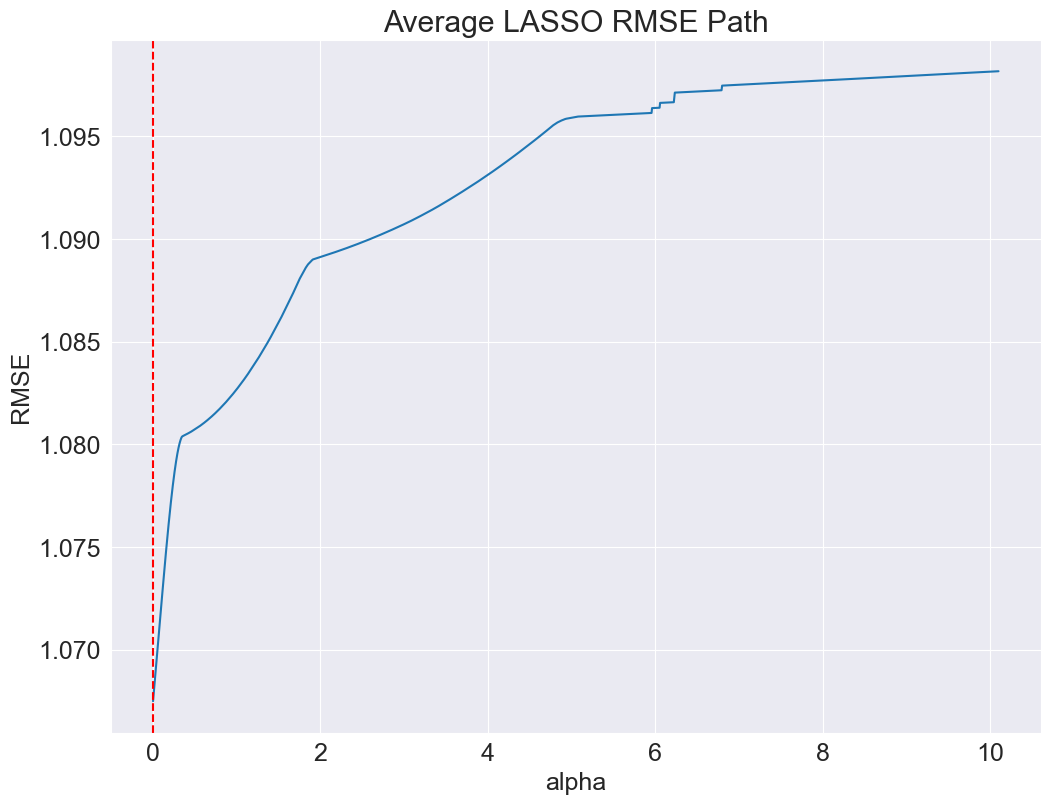

In [16]:
plt.plot(model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, model.mse_path_)))
plt.axvline(x=model.alpha_, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

In [17]:


rmse = lambda a,p : np.sqrt(np.sum(np.square(a - p)) / len(a))
train_score = rmse(y_train_pred, y_train)
test_score = rmse(y_test_pred, y_test)

train_score, test_score

(1.0819976121046593, 1.083764439156608)